  0	[(0, 1.0)]	1.00000
  1	[(-1, 0.50197), (1, 0.49803)]	1.00000
  2	[(-2, 0.25145), (0, 0.49928), (2, 0.24927)]	1.00000
  3	[(-3, 0.12624), (-1, 0.37588), (1, 0.37455), (3, 0.12333)]	1.00000
  4	[(-4, 0.06339), (-2, 0.25128), (0, 0.37524), (2, 0.24886), (4, 0.06123)]	1.00000
  5	[(-5, 0.0317), (-3, 0.15692), (-1, 0.3129), (1, 0.31218), (3, 0.15537), (5, 0.03093)]	1.00000
  6	[(-6, 0.016), (-4, 0.09384), (-2, 0.23589), (0, 0.31366), (2, 0.23211), (4, 0.09319), (6, 0.01531)]	1.00000
  7	[(-7, 0.00816), (-5, 0.05505), (-3, 0.1643), (-1, 0.27501), (1, 0.27176), (3, 0.16325), (5, 0.05513), (7, 0.00734)]	1.00000
  8	[(-8, 0.00408), (-6, 0.03122), (-4, 0.11073), (-2, 0.21802), (0, 0.27533), (2, 0.21696), (4, 0.10826), (6, 0.03169), (8, 0.00371)]	1.00000
  9	[(-9, 0.00213), (-7, 0.01745), (-5, 0.07177), (-3, 0.16284), (-1, 0.24768), (1, 0.24769), (3, 0.16123), (5, 0.0698), (7, 0.0175), (9, 0.00191)]	1.00000
 10	[(-10, 0.00103), (-8, 0.00975), (-6, 0.04517), (-4, 0.11679), (-2, 0.20545), (0, 0

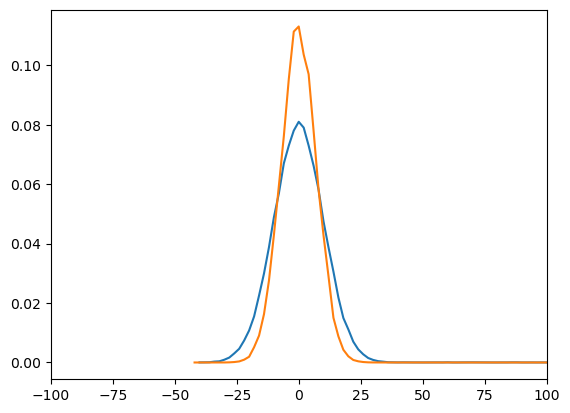

In [2]:
import random
import collections
import matplotlib.pyplot as plt


def get_counts(input_list, num_walkers, power):
    """
    Get the weighted counts for unique elements in an input list using a given power and number of walkers.

    Arenas:
        input_list (List[int]): A list of integers representing data points.
        num_walkers (int): Number of walkers used to calculate weights.
        power (int): The exponent applied to the counts for calculating weighted values.

    Returns:
        List[Tuple[int, float]]: A sorted list of tuples containing unique elements from input_list and their normalized weighted counts.

    Example usage:
    ```python
    data = [1, 2, 3, 4, 5]
    walkers = 2
    power = 2

    print(get_counts(data, walkers, power)) # [(1, 0.06666666666666667), (2, 0.13333333333333333), ...]
    ```
    """
    counter = collections.Counter(input_list)
    norm = sum([counter[n]**power for n in counter])
    return sorted((val, counter[val]**power/norm) for val in set(input_list))

def count_values_classic(input_list, num_walkers):
    """
    Wrapper function that calls get_counts() with power set to 1 to compute the porbabilities in the classical framework

    Args:
        input_list (List[int]): A list of integers representing data points.
        num_walkers (int): Number of walkers used to calculate weights.

    Returns:
        List[Tuple[int, float]]: A sorted list of tuples containing unique elements from input_list and their weighted counts with power=1.

    Example usage:
    ```python
    data = [1, 2, 3, 4, 5]
    walkers = 2

    print(count_values_classic(data, walkers)) # [(1, 0.2), (2, 0.2), ...]
    ```
    """
    return get_counts(input_list, num_walkers, 1)

def count_values_qm(input_list, num_walkers):
    """
    Wrapper function that calls get_counts() with power set to 1 to compute the porbabilities in the QM framework


    Args:
        positions (list of list of ints): A list of position lists for all walkers at a specific step.
        num_walkers (int): The number of walkers in the simulation.

    Returns:
        tuple of tuples: Each inner tuple contains a value and its squared count across all walks, with power set equal to 2.
    """
    return get_counts(input_list, num_walkers, 2)

def random_walk(num_steps=4, start=0, num_walkers=10000):
    """
    1-Dimensional Random Walk simulation.

    :param num_steps: The number of steps to simulate (default: 100)
    :param start: Starting position (default: 0)
    :param num_walkers: Number of walkers (default: 100)
    :return: A list containing the random walk's coordinates in the format [x, index].
    """

    # Initialize walk with starting position
    walk = [[ start for _ in range(num_walkers)]+[0]]

    for k in range(1, num_steps + 1):
        walk.append([k])
        for walker in range(num_walkers):
            # Append new position (x and index) the current step of the walk is walk[-1]
            walk[-1].append(walk[-2][walker] + random.choice([-1, 1]))

    return walk

# Example usage:
num_walkers=100000
num_steps=100
for step in random_walk(num_steps,0,num_walkers):
    RW=count_values_classic(step[1:],num_walkers)
    P_sum=sum([node[1] for node in RW]) #check if sum of prob is 1
    print("{:3}\t{}\t{:1.5f}".format(step[0],RW,P_sum))

# unzip the list of tuple (value, counts) in two lists
values,counts=zip(*RW)

for step in random_walk(num_steps,0,num_walkers):
    qm_RW=count_values_qm(step[1:],num_walkers)
    P_sum=sum([node[1] for node in qm_RW])
    # Round qm_RW to limit number of digits
    rounded_QM_RW = [(k, round(v,3)) for k, v in qm_RW]
    print("{:3}\t{}\t{:1.5f}".format(step[0],rounded_QM_RW,P_sum))

# unzip the list of tuple (value, counts) in two lists
values_qm,counts_qm=zip(*qm_RW)


plt.plot(values, counts)
plt.plot(values_qm, counts_qm)
plt.xlim(-(num_steps), num_steps)
plt.show()


In [103]:
collections.Counter([random.choice([-1, 1]) for _ in range(100000)])

Counter({-1: 50105, 1: 49895})